In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam, optics, beamline2d

In [2]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 9500.

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 10
}

In [3]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

# Stack of 20 CRLs for tight focus
crl_list = []
for i in range(3):
    crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, diameter=500e-6, roc=100e-6))

IP = optics.PPM('IP', FOV=20e-6, z=804.513, N=256)

upstream_YAG = optics.PPM('YAG1',FOV=2e-3,z=800.02 + 1e-3, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803)


devices = [mr1l0,mr2l0, IP,upstream_YAG]
devices = devices + crl_list

XPP = beamline2d.Beamline(devices)

FWHM in x: 359.90462293506476 microns
FWHM in y: 359.90462293506476 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused


mr1l0
drift1
zRx: 155596685.26 microns
zRy: 155596685.26 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 155596685.26 microns
zRy: 155596685.26 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 155596685.26 microns
zRy: 155596685.26 microns
remaining distance: 14403314.74 microns
goal for zx: 170000000.00 microns
current zx: 155596685.26 microns
goal for zy: 170000000.00 microns
current zy: 155596685.26 microns
crl0
focal length: 13.24
drift3
zRx: 1109273.63 microns
zRy: 1109273.63 microns
remaining distance: 1000.00 microns
goal for zx: -14356195.39 microns
current zx: -14357195.39 microns
goal for zy: -14356195.39 microns
current zy: -14357195.39 microns
crl1
fo

<IPython.core.display.Javascript object>


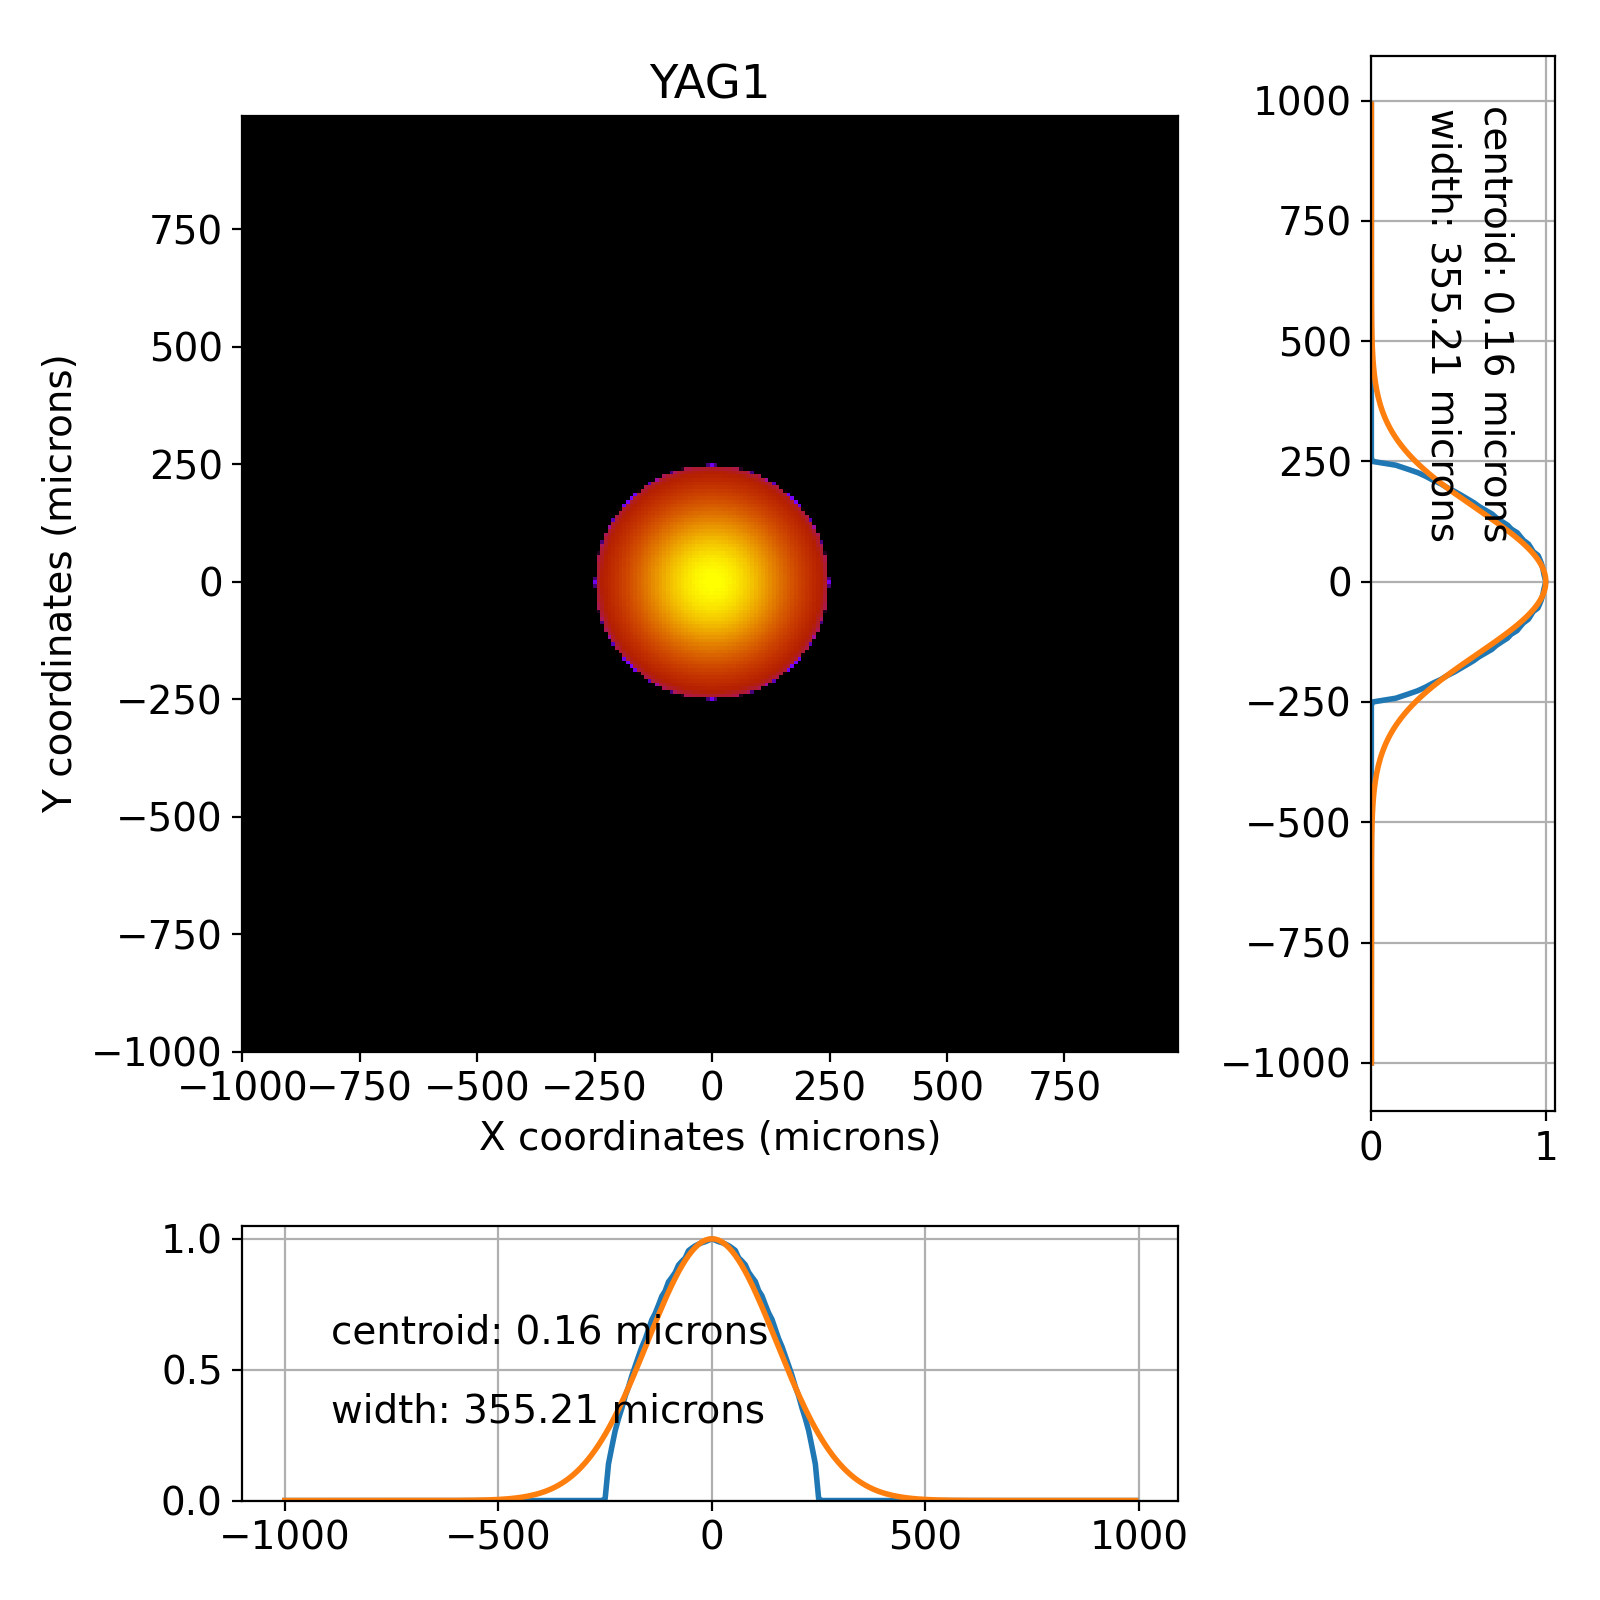

<IPython.core.display.Javascript object>


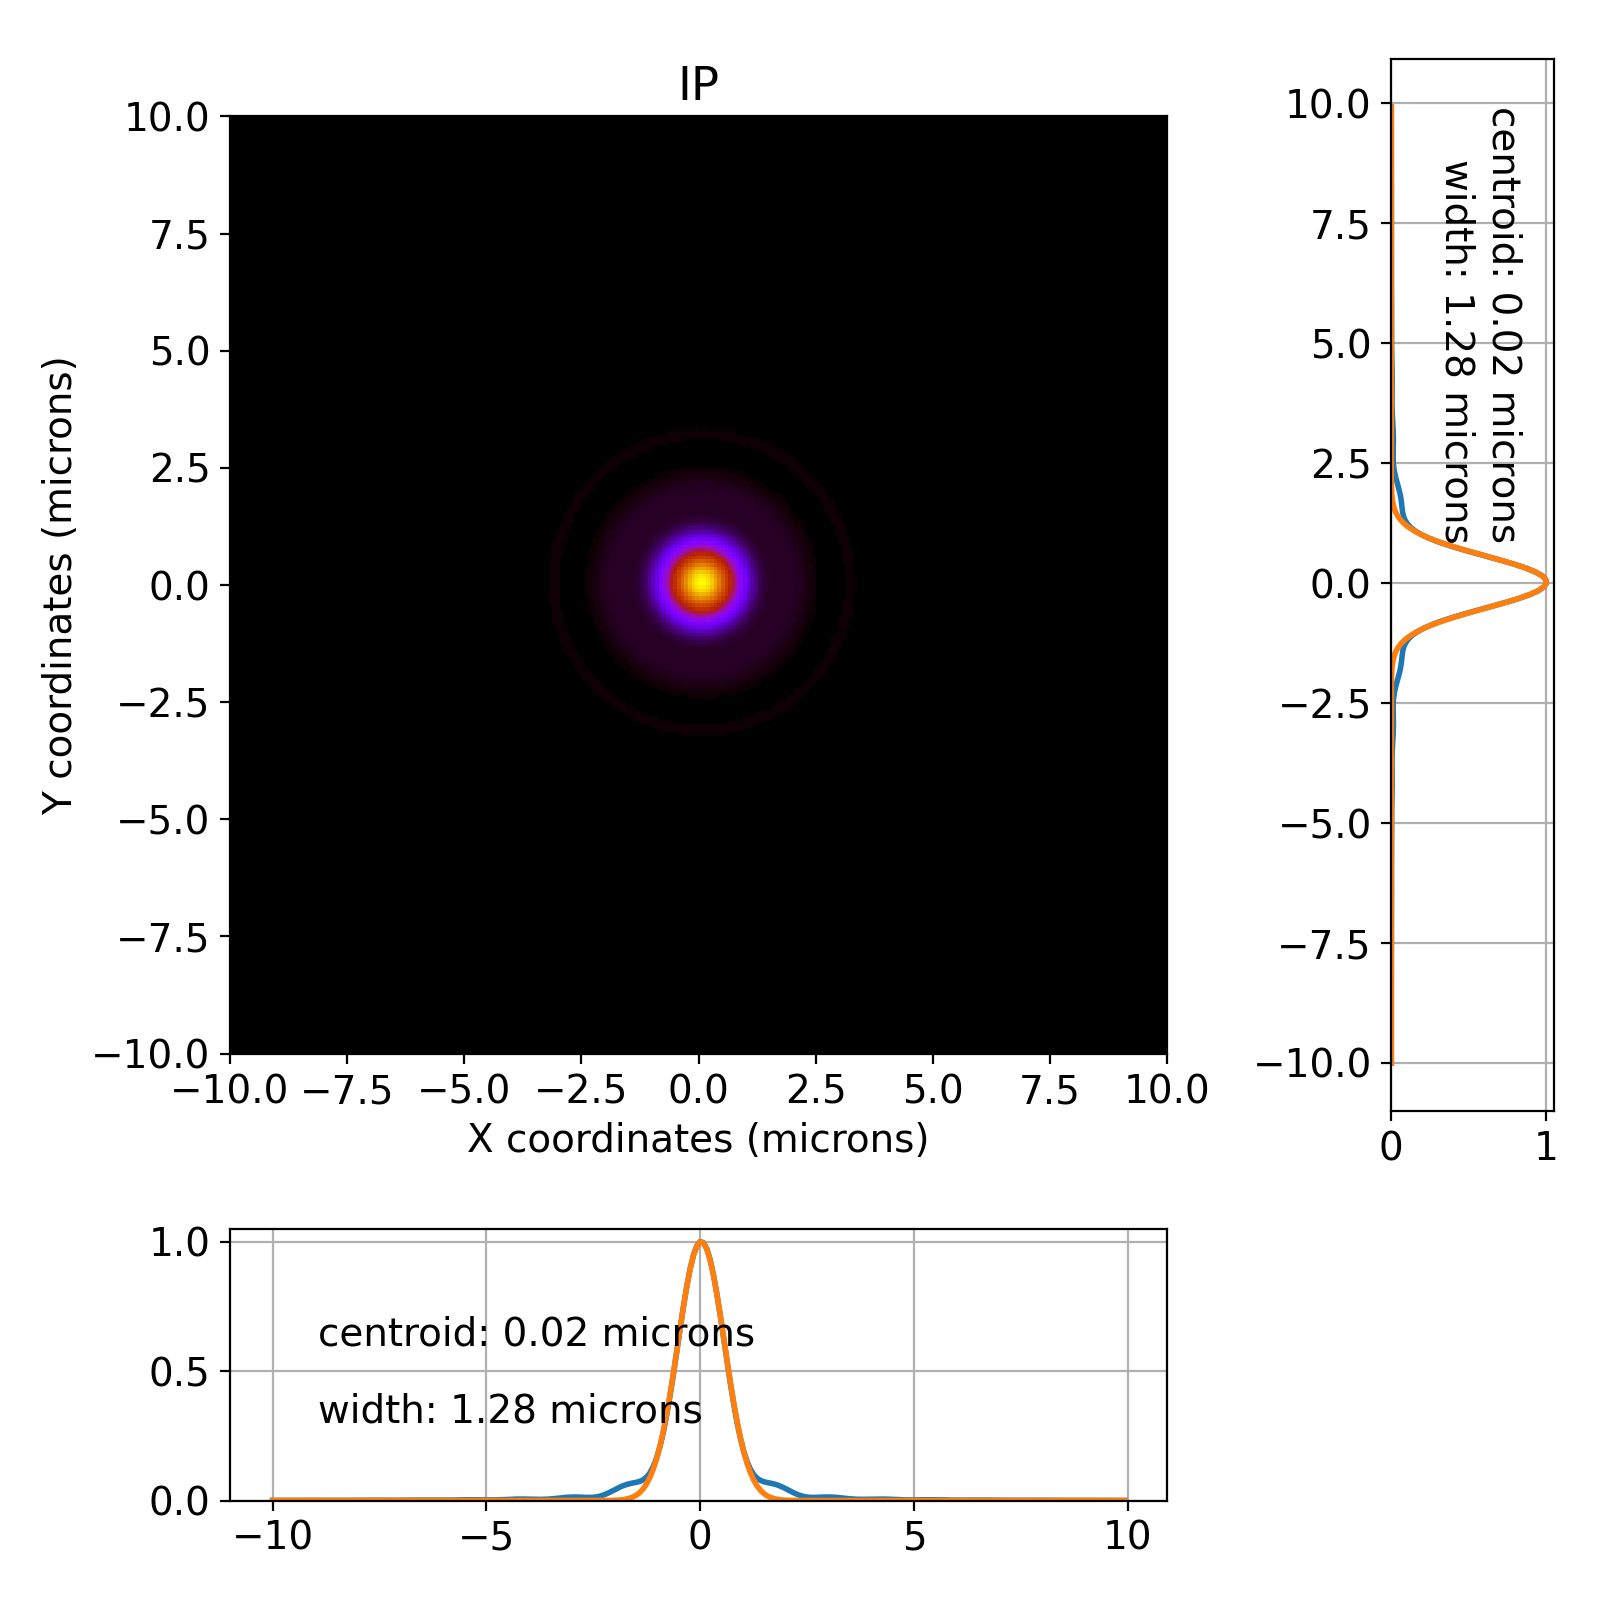

In [4]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
# XPP.YAG.view_beam()

In [5]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=20, time_window=200)

In [ ]:
pulse_test.propagate(beamline=XPP, screen_names=['IP','YAG1'])

FWHM in x: 359.9134097129203 microns
FWHM in y: 359.9134097129203 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused
mr1l0
drift1
zRx: 155592877.38 microns
zRy: 155592877.38 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 155592877.38 microns
zRy: 155592877.38 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 155592877.38 microns
zRy: 155592877.38 microns
remaining distance: 14407122.62 microns
goal for zx: 170000000.00 microns
current zx: 155592877.38 microns
goal for zy: 170000000.00 microns
current zy: 155592877.38 microns
crl0
focal length: 13.24
drift3
zRx: 1109133.33 microns
zRy: 1109133.33 microns
remaining distanc

crl1
focal length: 13.24
drift4
zRx: 255298.08 microns
zRy: 255298.08 microns
remaining distance: 1000.00 microns
goal for zx: -6886277.21 microns
current zx: -6887277.21 microns
goal for zy: -6886277.21 microns
current zy: -6887277.21 microns
crl2
focal length: 13.24
drift5
zRx: 110475.61 microns
zRy: 110475.61 microns
remaining distance: 19000.00 microns
goal for zx: -4510955.43 microns
current zx: -4529955.43 microns
goal for zy: -4510955.43 microns
current zy: -4529955.43 microns
YAG1
drift6
zRx: 110475.61 microns
zRy: 110475.61 microns
remaining distance: 4492000.00 microns
goal for zx: -18955.43 microns
current zx: -4510955.43 microns
goal for zy: -18955.43 microns
current zy: -4510955.43 microns
x becomes focused
y becomes focused
zRx: 110475.61 microns
zRy: 110475.61 microns
remaining distance: 91520.18 microns
goal for zx: -18955.43 microns
current zx: -110475.61 microns
goal for zy: -18955.43 microns
current zy: -110475.61 microns
IP
FWHM in x: 359.9100623182016 microns
FWHM 

crl0
focal length: 13.24
drift3
zRx: 1109226.86 microns
zRy: 1109226.86 microns
remaining distance: 1000.00 microns
goal for zx: -14355951.00 microns
current zx: -14356951.00 microns
goal for zy: -14355951.00 microns
current zy: -14356951.00 microns
crl1
focal length: 13.24
drift4
zRx: 255309.98 microns
zRy: 255309.98 microns
remaining distance: 1000.00 microns
goal for zx: -6886405.77 microns
current zx: -6887405.77 microns
goal for zy: -6886405.77 microns
current zy: -6887405.77 microns
crl2
focal length: 13.24
drift5
zRx: 110480.70 microns
zRy: 110480.70 microns
remaining distance: 19000.00 microns
goal for zx: -4511038.87 microns
current zx: -4530038.87 microns
goal for zy: -4511038.87 microns
current zy: -4530038.87 microns
YAG1
drift6
zRx: 110480.70 microns
zRy: 110480.70 microns
remaining distance: 4492000.00 microns
goal for zx: -19038.87 microns
current zx: -4511038.87 microns
goal for zy: -19038.87 microns
current zy: -4511038.87 microns
x becomes focused
y becomes focused
zR

mr1l0
drift1
zRx: 155596866.59 microns
zRy: 155596866.59 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 155596866.59 microns
zRy: 155596866.59 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 155596866.59 microns
zRy: 155596866.59 microns
remaining distance: 14403133.41 microns
goal for zx: 170000000.00 microns
current zx: 155596866.59 microns
goal for zy: 170000000.00 microns
current zy: 155596866.59 microns
crl0
focal length: 13.24
drift3
zRx: 1109280.31 microns
zRy: 1109280.31 microns
remaining distance: 1000.00 microns
goal for zx: -14356230.31 microns
current zx: -14357230.31 microns
goal for zy: -14356230.31 microns
current zy: -14357230.31 microns
crl1
fo